In [1]:
import numpy as np
np.random.seed(123)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from tqdm import tqdm

import operator
from functools import reduce

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
size = 51
size_class_0 = size//2+size%2
size_class_1 = size//2
number_of_intervals = 10
default_forecast_value = 0
color_map = {0: "#ce5580", 1:"#4a8082"}
alpha_map = {True: 0.6, False: 0.25}
remaining_class = {0:1, 1:0}

In [3]:
np_arr = np.random.rand(size,3)
np_arr

array([[0.69646919, 0.28613933, 0.22685145],
       [0.55131477, 0.71946897, 0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 ],
       [0.39211752, 0.34317802, 0.72904971],
       [0.43857224, 0.0596779 , 0.39804426],
       [0.73799541, 0.18249173, 0.17545176],
       [0.53155137, 0.53182759, 0.63440096],
       [0.84943179, 0.72445532, 0.61102351],
       [0.72244338, 0.32295891, 0.36178866],
       [0.22826323, 0.29371405, 0.63097612],
       [0.09210494, 0.43370117, 0.43086276],
       [0.4936851 , 0.42583029, 0.31226122],
       [0.42635131, 0.89338916, 0.94416002],
       [0.50183668, 0.62395295, 0.1156184 ],
       [0.31728548, 0.41482621, 0.86630916],
       [0.25045537, 0.48303426, 0.98555979],
       [0.51948512, 0.61289453, 0.12062867],
       [0.8263408 , 0.60306013, 0.54506801],
       [0.34276383, 0.30412079, 0.41702221],
       [0.68130077, 0.87545684, 0.51042234],
       [0.66931378, 0.58593655, 0.6249035 ],
       [0.67468905, 0.84234244, 0.08319499],
       [0.

In [4]:
t = np.array([0 for x in range(size_class_0)] + [1 for x in range(size_class_1)])
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

### Functions

In [5]:
def get_borders(x):
    return x/number_of_intervals, (x+1)/number_of_intervals

def init_dict(default=default_forecast_value):
    obj = {}
    obj['samples'] = []
    obj['idxs'] = []
    obj['default'] = default
    return obj

def group_data(obj, data_range, t=t, level=0):
    for idx in data_range:
        val = np_arr[:, level][idx]
        if val >= low and val < high:
            obj['samples'].append(t[idx])
            obj['idxs'].append(idx)
    return obj

def get_result(obj):
    if obj['samples'].count(obj['default']) >= obj['samples'].count(remaining_class[obj['default']]):
        return obj['default'] 
    else:
        return remaining_class[obj['default']] 
    
def get_missing(obj):
    return len([x for x in obj['samples'] if x != obj['result']])

def is_empty(obj):
    return bool(obj['samples'])

## 1D

In [6]:
one_d_distribution = {}
missed_results = 0
for x in range(number_of_intervals):
    
    low, high = get_borders(x)
    one_d_distribution[low] = init_dict()
    one_d_distribution[low] = group_data(one_d_distribution[low], [x for x in range(len(np_arr[:, 0]))], level=0)
    one_d_distribution[low]['result'] = get_result(one_d_distribution[low])
    one_d_distribution[low]['missed'] = get_missing(one_d_distribution[low])
    missed_results += one_d_distribution[low]['missed']

empty_intervals = len([x for x in one_d_distribution if (not one_d_distribution[x]['samples'])])

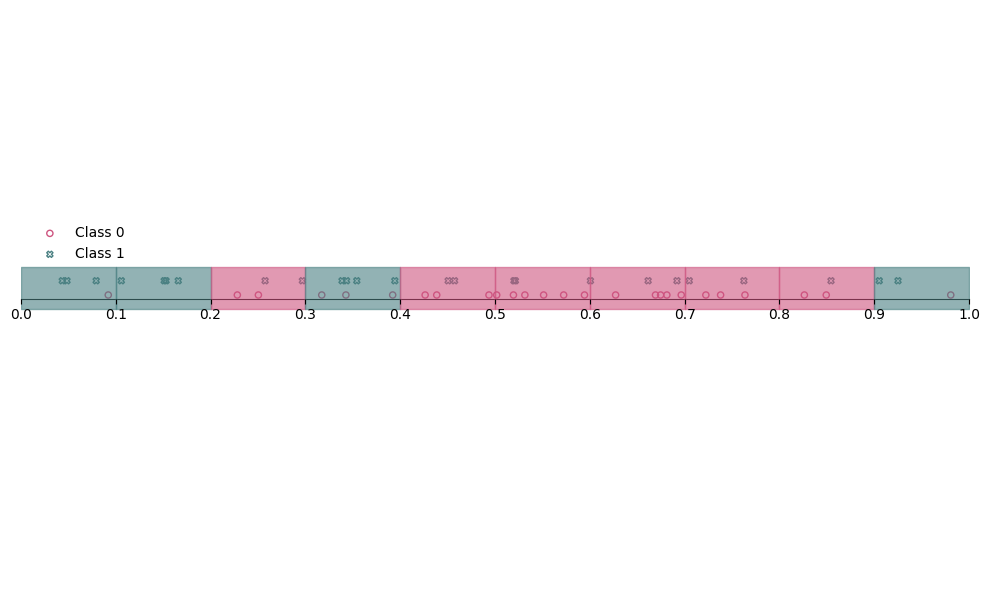

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.scatter(np_arr[:size_class_0,0], [0]*(size_class_0),
    edgecolors = color_map[0],
    c = "None",
    s = 20,
    marker = "o",
    label = "Class 0",
)
ax.scatter(np_arr[size_class_0:,0], [0.05]*(size_class_1),
    edgecolors = color_map[1],
    c = "None",
    s = 20,
    marker = "X",
    label = "Class 1",
)

number_of_intervals = 10
for x in range(number_of_intervals):
    low = x/number_of_intervals
    color = color_map[one_d_distribution[low]['result']]        
    ax.fill_between([low, (x+1)/number_of_intervals], [0.1, 0.1], [-0.05, -0.05],
        alpha = alpha_map[is_empty(one_d_distribution[low])],
        color = color,
        zorder = 1
    )

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ax.get_yaxis().set_visible(False)

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position(("data",-0.01295))
ax.spines["bottom"].set_zorder(0)
ax.legend(frameon=False,loc=(0.01,0.55))

plt.tight_layout()
plt.show()

In [8]:
missed_results, empty_intervals

(17, 0)

## 2D

In [9]:
two_d_distribution = {}
missed_results = 0
for k in one_d_distribution:
    two_d_distribution[k] = {}
    for y in range(number_of_intervals):
        low, high = get_borders(y)
        two_d_distribution[k][low] = init_dict(one_d_distribution[k]['result'])
        two_d_distribution[k][low] = group_data(two_d_distribution[k][low], one_d_distribution[k]['idxs'], level=1)
        
        if not two_d_distribution[k][low]['samples']:
            two_d_distribution[k][low]['result'] = one_d_distribution[k]['result']
        else:        
            two_d_distribution[k][low]['result'] = get_result(two_d_distribution[k][low])
        two_d_distribution[k][low]['missed'] = get_missing(two_d_distribution[k][low])
        missed_results += two_d_distribution[k][low]['missed']

empty_intervals = len(sum([[two_d_distribution[i][j] 
                            for j in two_d_distribution[i] if (not two_d_distribution[i][j]['samples'])] 
                               for i in two_d_distribution], []))

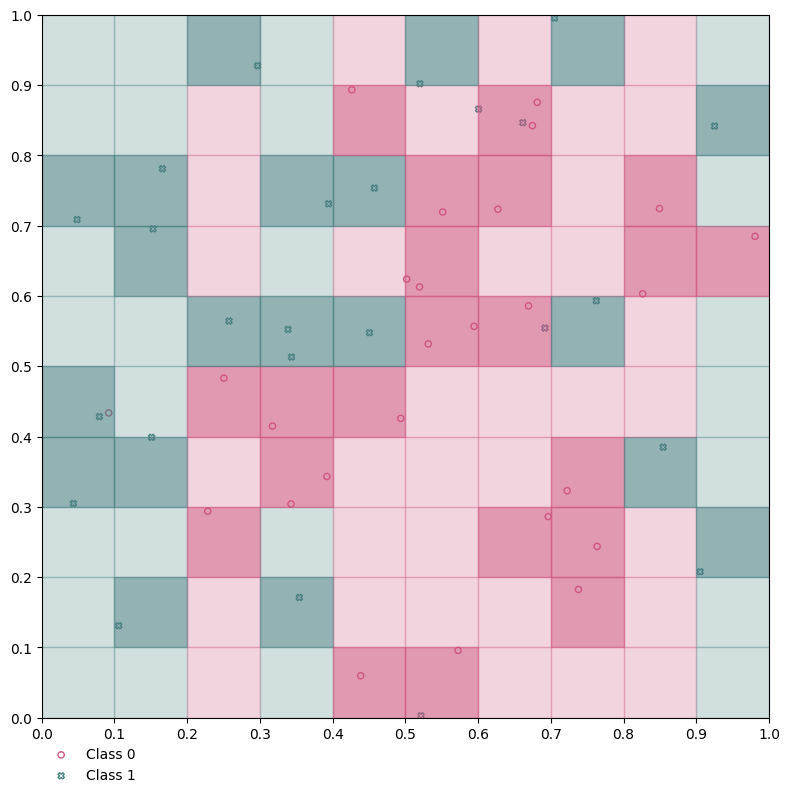

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(np_arr[:size_class_0,0], np_arr[:size_class_0,1],
    edgecolors = color_map[0],
    c = "None",
    s = 20,
    marker = "o",
    label = "Class 0",
)
ax.scatter(np_arr[size_class_0:,0], np_arr[size_class_0:,1],
    edgecolors = color_map[1],
    c = "None",
    s = 20,
    marker = "X",
    label = "Class 1",
)

for x in range(number_of_intervals):
    for y in range(number_of_intervals):
        low_x = x/number_of_intervals
        low_y = y/number_of_intervals
        
        high_x = (x+1)/number_of_intervals
        high_y = (y+1)/number_of_intervals
        
        color = color_map[two_d_distribution[low_x][low_y]['result']]        
        ax.fill_between([low_x, high_x], [low_y, low_y], [high_y, high_y],
            alpha = alpha_map[is_empty(two_d_distribution[low_x][low_y])],
            color = color,
            zorder = 1
        )
        
ax.set_xlim(0.0,1.0)
ax.set_ylim(0.0,1.0)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.legend(frameon=False,loc=(0,-0.1))

plt.tight_layout()
plt.show()


In [11]:
missed_results, empty_intervals

(5, 59)

## 3D

In [12]:
#set to 720
MAX_ANGLE = 1

In [13]:
three_d_distribution = {}
missed_results = 0
for k in two_d_distribution:
    three_d_distribution[k] = {}
    for l in two_d_distribution[k]:
        three_d_distribution[k][l] = {}
        for y in range(number_of_intervals):
            low, high = get_borders(y)
            three_d_distribution[k][l][low] = init_dict(two_d_distribution[k][l]['result'])
            three_d_distribution[k][l][low] = group_data(three_d_distribution[k][l][low], two_d_distribution[k][l]['idxs'], level=2)

            if not three_d_distribution[k][l][low]['samples']:
                three_d_distribution[k][l][low]['result'] = two_d_distribution[k][l]['result']
            else:        
                three_d_distribution[k][l][low]['result'] = get_result(three_d_distribution[k][l][low])
            three_d_distribution[k][l][low]['missed'] = get_missing(three_d_distribution[k][l][low])
            missed_results += three_d_distribution[k][l][low]['missed']
            
empty_intervals_arr = [[[0 for k in three_d_distribution[i][j] if (not three_d_distribution[i][j][k]['samples'])] for j in three_d_distribution[i]] 
                               for i in three_d_distribution]
empty_intervals = len(reduce(operator.concat, reduce(operator.concat, empty_intervals_arr)))

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


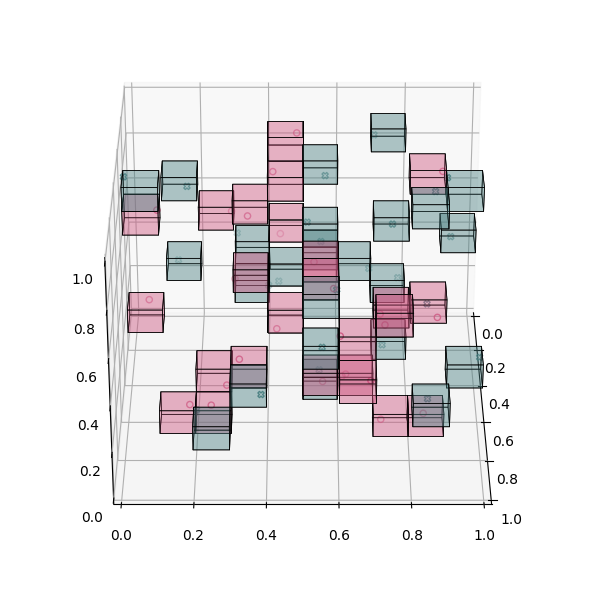

In [14]:
 for angle in tqdm(range(0,MAX_ANGLE)):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection="3d")

    ax.scatter3D(np_arr[:size_class_0,0], np_arr[:size_class_0,1], np_arr[:size_class_0,2],
        edgecolor = color_map[0],
        facecolor=(0,0,0,0),
        s = 20,
        marker = "o",
        label = "Class 0"
    )
    ax.scatter3D(np_arr[size_class_0:,0], np_arr[size_class_0:,1], np_arr[size_class_0:,2],
        edgecolor = color_map[1],
        facecolor=(0,0,0,0),
        s = 20,
        marker = "X",
        label = "Class 1",
    )

    for x in range(number_of_intervals):
        for y in range(number_of_intervals):
            for z in range(number_of_intervals):
                low_x = x/number_of_intervals
                low_y = y/number_of_intervals
                low_z = z/number_of_intervals

                high_x = (x+1)/number_of_intervals
                high_y = (y+1)/number_of_intervals
                high_z = (z+1)/number_of_intervals
                
                arr = []
                if three_d_distribution[low_x][low_y][low_z]['samples']:
                    arr.append([[low_x, low_y, low_z], [high_x, low_y, low_z], [high_x, high_y, low_z], [low_x, high_y, low_z]])
                    arr.append([[low_x, low_y, high_z], [high_x, low_y, high_z], [high_x, high_y, high_z], [low_x, high_y, high_z]])
                    arr.append([[low_x, low_y, low_z], [high_x, low_y, low_z], [high_x, low_y, high_z], [low_x, low_y, high_z]])
                    arr.append([[low_x, high_y, low_z], [high_x, high_y, low_z], [high_x, high_y, high_z], [low_x, high_y, high_z]])
                    arr.append([[low_x, low_y, low_z], [low_x, high_y, low_z], [low_x, high_y, high_z], [low_x, low_y, high_z]])
                    arr.append([[high_x, low_y, low_z], [high_x, high_y, low_z], [high_x, high_y, high_z], [high_x, low_y, high_z]])
                color = color_map[three_d_distribution[low_x][low_y][low_z]['result']]
                
                ax.add_collection3d(Poly3DCollection(
                    arr,
                    facecolors=color,
                    linewidths=0.5,
                    edgecolors="k",
                    alpha=0.25)
                )

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)

    plt.tight_layout()
    
    ##folder should exist
    ##to check may consider using os.listdir, os.mkdir
    ax.view_init(30,angle/2)
    if angle < 10:
        angle_str = "00" + str(angle)
    elif angle < 100:
        angle_str = "0" + str(angle)
    else:
        angle_str = str(angle)
    plt.savefig("3d/step"+angle_str+".png")

plt.show()

In [15]:
missed_results, empty_intervals

(1, 951)

In [16]:
#ffmpeg -i step%03d.png -r 36 ./360animation.mp4